In [1]:
#importing necessary libraries
import yfinance as yf  #stock price API
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpt
import numpy as np

In [2]:
#Retrieving historical data for 1 month and creating a data frame for it
tickersymbol='2222.SR'
ticker=yf.Ticker(tickersymbol)
historical1mth=ticker.history(period='1mo')
aramcodf=pd.DataFrame(historical1mth)

In [3]:
#Showing first 5 rows of historical data
aramcodf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-22 00:00:00+03:00,27.40,27.549999,27.299999,27.450001,5693077,0.0,0.0
2024-09-24 00:00:00+03:00,27.50,27.600000,27.450001,27.549999,8761561,0.0,0.0
2024-09-25 00:00:00+03:00,27.60,27.750000,27.500000,27.750000,10780703,0.0,0.0
2024-09-26 00:00:00+03:00,27.75,27.750000,27.549999,27.600000,8365226,0.0,0.0
2024-09-29 00:00:00+03:00,27.60,27.600000,27.200001,27.250000,11539293,0.0,0.0


In [4]:
#Converting "Date" column to date-time format,and since it is already the index we don't need to set it
aramcodf.index = pd.to_datetime(aramcodf.index)

In [5]:
#Statistical summary of the data
aramcodf.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.0,20.0
mean,27.225000,27.290000,27.107500,27.192500,1.141955e+07,0.0,0.0
std,0.228554,0.226878,0.200181,0.225526,5.561531e+06,0.0,0.0
min,27.000000,27.049999,26.900000,26.950001,0.000000e+00,0.0,0.0
25%,27.049999,27.137500,26.987500,27.049999,8.662477e+06,0.0,0.0
50%,27.175000,27.200001,27.025000,27.125000,1.051338e+07,0.0,0.0
75%,27.324999,27.362499,27.200001,27.212501,1.621025e+07,0.0,0.0
max,27.750000,27.750000,27.549999,27.750000,2.396779e+07,0.0,0.0


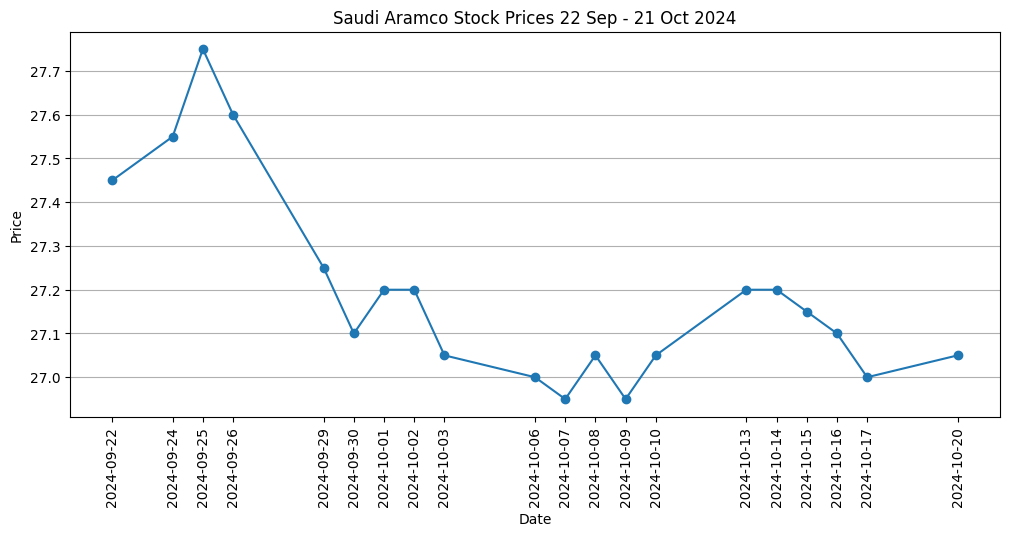

In [6]:
#Visualizing the stock price fluctuations for the past month
plt.figure(figsize=(12,5))
plt.plot(aramcodf['Close'],label='Price at Closing',marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Saudi Aramco Stock Prices 22 Sep - 21 Oct 2024')
plt.xticks(ticks=aramcodf.index[::1], labels=aramcodf.index[::1].strftime('%Y-%m-%d'), rotation=90)
plt.grid(axis='y')
plt.show()

#spaces in the plot indicate closed market days

In [7]:
#Making a prediction model for the closing stock price

#importing necessities
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


x=aramcodf[['Open','High','Low','Volume']]
y=aramcodf['Close']

#Splitting the data into trainin and testing sets using 20% of the data as a test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#Creating a Linear Regression object
lr=LinearRegression()

#Fitting the model
lr.fit(x_train,y_train)

#Making predictions
yhat=lr.predict(x_test)

In [8]:
#Model evaluation using Mean Squared Error And R-squared
mse=mean_squared_error(y_test, yhat)
r2=r2_score(y_test, yhat)
mae=mean_absolute_error(y_test, yhat)
print('Mean Squared Error:',mse)
print('R-squared:',r2)
print('Mean Absolute Error:',mae)

Mean Squared Error: 0.000546513002467046
R-squared: 0.989171246093322
Mean Absolute Error: 0.019813094060154413


In [9]:
#Actual Prices v Predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})
results

,Actual,Predicted
Date,,
2024-10-17 00:00:00+03:00,27.000000,27.038879
2024-09-24 00:00:00+03:00,27.549999,27.571839
2024-10-20 00:00:00+03:00,27.049999,27.062855
2024-10-03 00:00:00+03:00,27.049999,27.044322


## Analysis Summary

This analysis indicates that Saudi Aramco's stock price has remained relatively stable over the past month, with low volatility and a consistent trading volume. These insights can serve as a foundation for further exploration into factors driving stock performance and investor behavior.
